# Configuration

In [ ]:
# Parameters
PROJECT_NAME = 'ML1010-Group-Project'
ENABLE_COLAB = True

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni/Documents/ML_Projects'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [ ]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Mounted at /content/gdrive


'Adding COLAB path to sys: /content/gdrive/MyDrive/Colab Notebooks/utility_files'

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/MyDrive/Colab Notebooks/utility_files']

'COLAB Enabled. Setting WORKING_DIR: /content/gdrive/MyDrive/Colab Notebooks/ML1010-Group-Project'

'Setting WORKING_DIR: /content/gdrive/MyDrive/Colab Notebooks/ML1010-Group-Project'

'Working directory exists.'

Current working directory: /content/gdrive/MyDrive/Colab Notebooks/ML1010-Group-Project



# Setup Runtime Environment

In [ ]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q

  if GENERATE_PROFILE:
    !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
  
else:
  display('Google Colab not enabled')

#Common imports
import json
import gzip
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Data

In [ ]:
### load the meta data
data = pd.read_pickle('trimmed_cellphone.pkl')
    
mvutils.exploreDataframe(data)

dataframe shape: (63920, 30)


Top 5 in dataframe


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,1.0,False,2004-09-21,A5JLAU2ARJ0BO,B0000E3GWH,NaN,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,1.0,False,2004-09-21,A5JLAU2ARJ0BO,B0000E3GWH,NaN,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,4.0,False,2004-07-24,A1ACM1CBGORBN1,B0000E3GWH,NaN,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,4.0,False,2004-07-24,A1ACM1CBGORBN1,B0000E3GWH,NaN,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,3.0,False,2004-07-06,A2V48Q03FZUOSD,B0000E3GWH,NaN,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],,Samsung,[],"[>#3,059,436 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...




Bottom 5 in dataframe


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
63915,1.0,True,2018-01-15,A13L832YDDGU9G,B00PDML6U8,NaN,Terri W,The phone was stolen could not activate at all...,Stolen metro PC's phone,1515974400,NaN,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,[The Galaxy LightTM will give you more ways to...,,Samsung Galaxy Light SGH-T399N Android 4G-LTE ...,"[B00H50DVPE, B00GXG8SPY]",,Samsung,"[Android 4.2.2 system (Jelly Bean), Fast 1.4Gh...","[>#657,463 in Cell Phones & Accessories (See T...","[B00KB5E7KI, B00U6WANTU, B00H50DVPE, B00F9S93S...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$53.95,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
63916,5.0,True,2016-08-15,A2UFV43VAUFKSH,B00PDML6U8,NaN,Nstor Jose Mattey Fuentes,good,Five Stars,1471219200,NaN,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,[The Galaxy LightTM will give you more ways to...,,Samsung Galaxy Light SGH-T399N Android 4G-LTE ...,"[B00H50DVPE, B00GXG8SPY]",,Samsung,"[Android 4.2.2 system (Jelly Bean), Fast 1.4Gh...","[>#657,463 in Cell Phones & Accessories (See T...","[B00KB5E7KI, B00U6WANTU, B00H50DVPE, B00F9S93S...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$53.95,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
63917,1.0,True,2016-08-10,A2LQOV3RNG1Y2T,B00PDML6U8,NaN,Tim,I purchased two of them and had so many proble...,usually they are great products.,1470787200,NaN,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,[The Galaxy LightTM will give you more ways to...,,Samsung Galaxy Light SGH-T399N Android 4G-LTE ...,"[B00H50DVPE, B00GXG8SPY]",,Samsung,"[Android 4.2.2 system (Jelly Bean), Fast 1.4Gh...","[>#657,463 in Cell Phones & Accessories (See T...","[B00KB5E7KI, B00U6WANTU, B00H50DVPE, B00F9S93S...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$53.95,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
63918,5.0,True,2015-07-14,ADY00ZJCY53F1,B00PDML6U8,NaN,SILVANA HUERES,excelente,Five Stars,1436832000,2,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,[The Galaxy LightTM will give you more ways to...,,Samsung Galaxy Light SGH-T399N Android 4G-LTE ...,"[B00H50DVPE, B00GXG8SPY]",,Samsung,"[Android 4.2.2 system (Jelly Bean), Fast 1.4Gh...","[>#657,463 in Cell Phones & Accessories (See T...","[B00KB5E7KI, B00U6WANTU, B00H50DVPE, B00F9S93S...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$53.95,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
63919,4.0,False,2015-04-23,A2IK776FY6MEMG,B00PDML6U8,NaN,Obi Wan,This is a great Smartphone for someone who's n...,Great budget smartphone,1429747200,9,NaN,"['Cell Phones & Accessories', 'Cell Phones', '...",,[The Galaxy LightTM will give you more ways to...,,Samsung Galaxy Light SGH-T399N Android 4G-LTE ...,"[B00H50DVPE, B00GXG8SPY]",,Samsung,"[Android 4.2.2 system (Jelly Bean), Fast 1.4Gh...","[>#657,463 in Cell Phones & Accessories (See T...","[B00KB5E7KI, B00U6WANTU, B00H50DVPE, B00F9S93S...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$53.95,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...




dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63920 entries, 0 to 63919
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   overall          63920 non-null  float64       
 1   verified         63920 non-null  bool          
 2   reviewTime       63920 non-null  datetime64[ns]
 3   reviewerID       63920 non-null  object        
 4   asin             63920 non-null  object        
 5   style            29860 non-null  object        
 6   reviewerName     63912 non-null  object        
 7   reviewText       63887 non-null  object        
 8   summary          63903 non-null  object        
 9   unixReviewTime   63920 non-null  int64         
 10  vote             12512 non-null  object        
 11  image            616 non-null    object        
 12  category         63920 non-null  string        
 13  tech1            63920 non-null  object        
 14  description      63

None

# Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63920 entries, 0 to 63919
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   overall          63920 non-null  float64       
 1   verified         63920 non-null  bool          
 2   reviewTime       63920 non-null  datetime64[ns]
 3   reviewerID       63920 non-null  object        
 4   asin             63920 non-null  object        
 5   style            29860 non-null  object        
 6   reviewerName     63912 non-null  object        
 7   reviewText       63887 non-null  object        
 8   summary          63903 non-null  object        
 9   unixReviewTime   63920 non-null  int64         
 10  vote             12512 non-null  object        
 11  image            616 non-null    object        
 12  category         63920 non-null  string        
 13  tech1            63920 non-null  object        
 14  description      63920 non-null  objec

Beginning analysis on 'Main' frame......
Analysis column: brand
Distinct values (incl. null): 149
Number of null values: 0
Total documents in corpus: 63920

Top 20 for summary of column brand


,order,brand,docCount,cumulativeCount,percTotal,percCumulative
1,1,Samsung,16208,16208,0.25,0.25
2,2,BLU,9330,25538,0.15,0.40
3,3,LG,6661,32199,0.10,0.50
4,4,Motorola,4952,37151,0.08,0.58
5,5,Nokia,4885,42036,0.08,0.66
6,6,Apple,4053,46089,0.06,0.72
7,7,BlackBerry,3660,49749,0.06,0.78
8,8,HTC,2454,52203,0.04,0.82
9,9,Sony,1556,53759,0.02,0.84
10,10,Huawei,1402,55161,0.02,0.86




Last 20 for summary of column brand


,order,brand,docCount,cumulativeCount,percTotal,percCumulative
130,130,Lightahead,6,63822,0.0,1.0
131,131,LightInTheBox,6,63828,0.0,1.0
132,132,Iridium Communications LLC,6,63834,0.0,1.0
133,133,Leagoo,6,63840,0.0,1.0
134,134,Moonar,5,63845,0.0,1.0
135,135,Diswoe,5,63850,0.0,1.0
136,136,0,5,63855,0.0,1.0
137,137,E-Passion,5,63860,0.0,1.0
138,138,Doro,5,63865,0.0,1.0
139,139,Amar,5,63870,0.0,1.0




Lineplot showing brand distribution


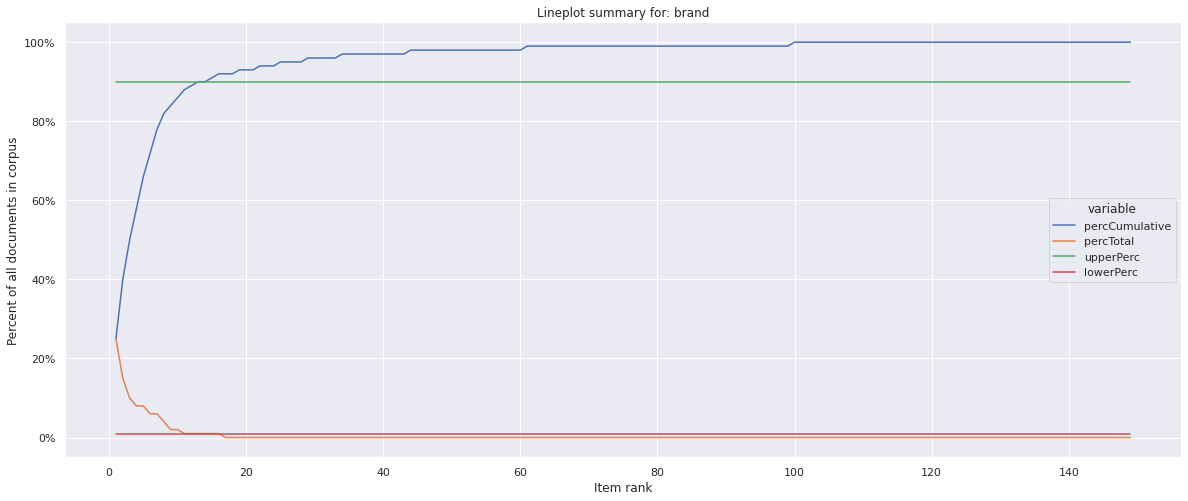




Barplot showing brand distribution
--->Dataset too large for barchart visibility: 149



Beginning analysis on 'Focused' frame......
Analysis column: brand
Distinct values (incl. null): 14
Number of null values: 0
Total documents in corpus: 57758

Top 20 for summary of column brand


,order,brand,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,Samsung,16208,16208,0.25,0.25,0.9,0.01,1,1
2,2,BLU,9330,25538,0.15,0.40,0.9,0.01,1,1
3,3,LG,6661,32199,0.10,0.50,0.9,0.01,1,1
4,4,Motorola,4952,37151,0.08,0.58,0.9,0.01,1,1
5,5,Nokia,4885,42036,0.08,0.66,0.9,0.01,1,1
6,6,Apple,4053,46089,0.06,0.72,0.9,0.01,1,1
7,7,BlackBerry,3660,49749,0.06,0.78,0.9,0.01,1,1
8,8,HTC,2454,52203,0.04,0.82,0.9,0.01,1,1
9,9,Sony,1556,53759,0.02,0.84,0.9,0.01,1,1
10,10,Huawei,1402,55161,0.02,0.86,0.9,0.01,1,1




Last 20 for summary of column brand


,order,brand,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,Samsung,16208,16208,0.25,0.25,0.9,0.01,1,1
2,2,BLU,9330,25538,0.15,0.40,0.9,0.01,1,1
3,3,LG,6661,32199,0.10,0.50,0.9,0.01,1,1
4,4,Motorola,4952,37151,0.08,0.58,0.9,0.01,1,1
5,5,Nokia,4885,42036,0.08,0.66,0.9,0.01,1,1
6,6,Apple,4053,46089,0.06,0.72,0.9,0.01,1,1
7,7,BlackBerry,3660,49749,0.06,0.78,0.9,0.01,1,1
8,8,HTC,2454,52203,0.04,0.82,0.9,0.01,1,1
9,9,Sony,1556,53759,0.02,0.84,0.9,0.01,1,1
10,10,Huawei,1402,55161,0.02,0.86,0.9,0.01,1,1




Lineplot showing brand distribution


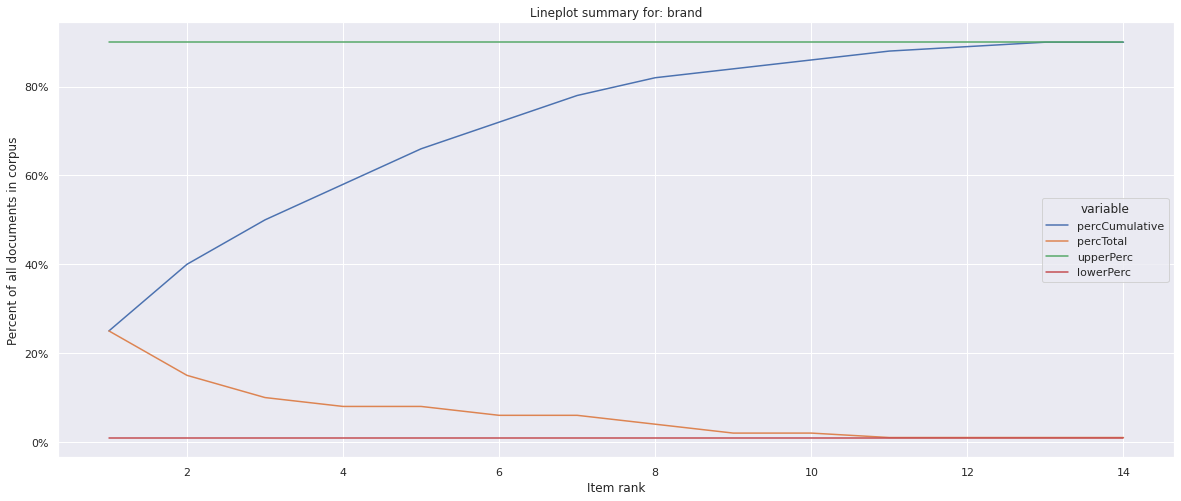




Barplot showing brand distribution


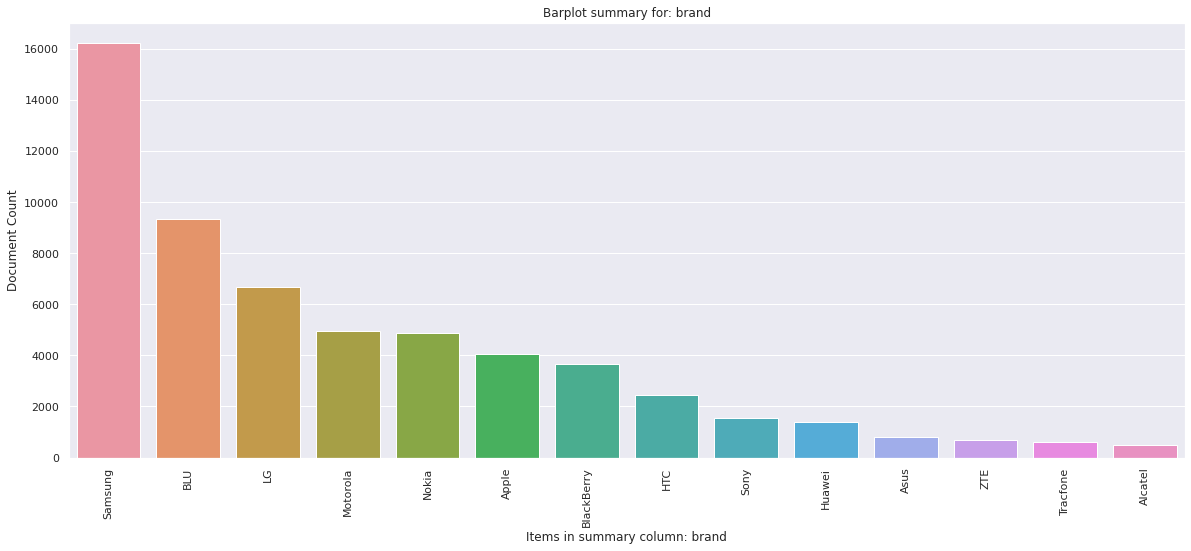

,analysisStage,columnName,totalDocuments,totalNulls,totalCategories,upperPerc,lowerPerc,percTotalDocuments,percTotalCategories
0,original,brand,63920,0,149,1.0,0.00,1.0,1.00
1,Trimmed,brand,57758,0,14,0.9,0.01,0.9,0.09


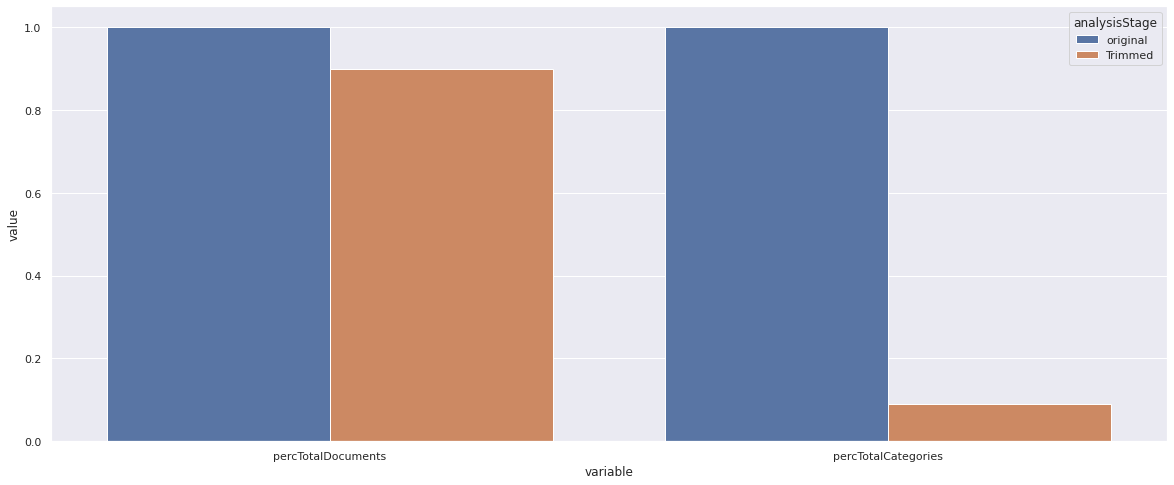

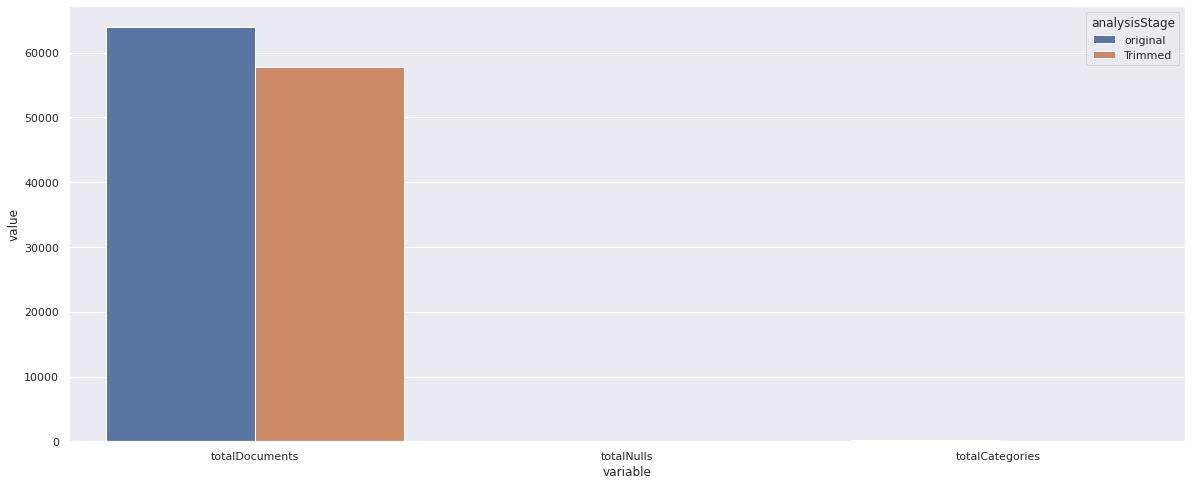

In [ ]:
expDf = mvutils.columnExplore(dataFrame = data, analysisColName = 'brand')

In [ ]:
expDf = mvutils.columnExplore(dataFrame = data, analysisColName = 'reviewerName', lowerPerc=0.0)

In [ ]:
expDf = mvutils.columnExplore(dataFrame = data, analysisColName = 'overall')

Beginning analysis on 'Main' frame......
Analysis column: vote
Distinct values (incl. null): 279
Number of null values: 0
Total documents in corpus: 12512

Top 20 for summary of column vote


,order,vote,docCount,cumulativeCount,percTotal,percCumulative
1,1,2,3776,3776,0.30,0.30
2,2,3,2019,5795,0.16,0.46
3,3,4,1246,7041,0.10,0.56
4,4,5,810,7851,0.06,0.63
5,5,6,654,8505,0.05,0.68
6,6,7,453,8958,0.04,0.72
7,7,8,365,9323,0.03,0.75
8,8,9,328,9651,0.03,0.77
9,9,10,250,9901,0.02,0.79
10,10,11,200,10101,0.02,0.81




Last 20 for summary of column vote


,order,vote,docCount,cumulativeCount,percTotal,percCumulative
260,260,253,1,12493,0.0,1.0
261,261,240,1,12494,0.0,1.0
262,262,241,1,12495,0.0,1.0
263,263,242,1,12496,0.0,1.0
264,264,244,1,12497,0.0,1.0
265,265,245,1,12498,0.0,1.0
266,266,246,1,12499,0.0,1.0
267,267,247,1,12500,0.0,1.0
268,268,250,1,12501,0.0,1.0
269,269,255,1,12502,0.0,1.0




Lineplot showing vote distribution


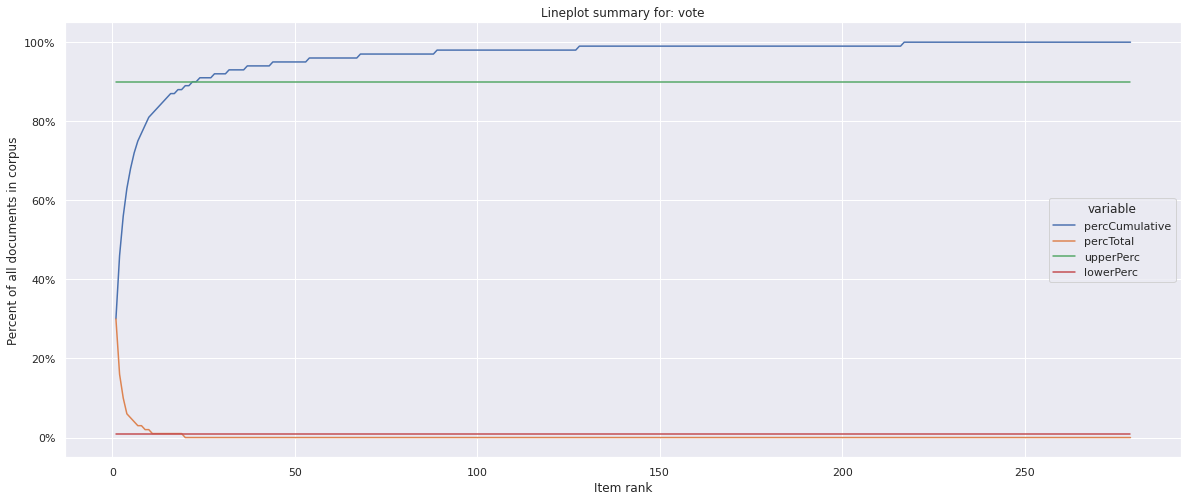




Barplot showing vote distribution
--->Dataset too large for barchart visibility: 279



Beginning analysis on 'Focused' frame......
Analysis column: vote
Distinct values (incl. null): 279
Number of null values: 0
Total documents in corpus: 12512

Top 20 for summary of column vote


,order,vote,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,2,3776,3776,0.30,0.30,0.9,0.01,1,1
2,2,3,2019,5795,0.16,0.46,0.9,0.01,1,1
3,3,4,1246,7041,0.10,0.56,0.9,0.01,1,1
4,4,5,810,7851,0.06,0.63,0.9,0.01,1,1
5,5,6,654,8505,0.05,0.68,0.9,0.01,1,1
6,6,7,453,8958,0.04,0.72,0.9,0.01,1,1
7,7,8,365,9323,0.03,0.75,0.9,0.01,1,1
8,8,9,328,9651,0.03,0.77,0.9,0.01,1,1
9,9,10,250,9901,0.02,0.79,0.9,0.01,1,1
10,10,11,200,10101,0.02,0.81,0.9,0.01,1,1




Last 20 for summary of column vote


,order,vote,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
260,260,253,1,12493,0.0,1.0,0.9,0.01,0,0
261,261,240,1,12494,0.0,1.0,0.9,0.01,0,0
262,262,241,1,12495,0.0,1.0,0.9,0.01,0,0
263,263,242,1,12496,0.0,1.0,0.9,0.01,0,0
264,264,244,1,12497,0.0,1.0,0.9,0.01,0,0
265,265,245,1,12498,0.0,1.0,0.9,0.01,0,0
266,266,246,1,12499,0.0,1.0,0.9,0.01,0,0
267,267,247,1,12500,0.0,1.0,0.9,0.01,0,0
268,268,250,1,12501,0.0,1.0,0.9,0.01,0,0
269,269,255,1,12502,0.0,1.0,0.9,0.01,0,0




Lineplot showing vote distribution


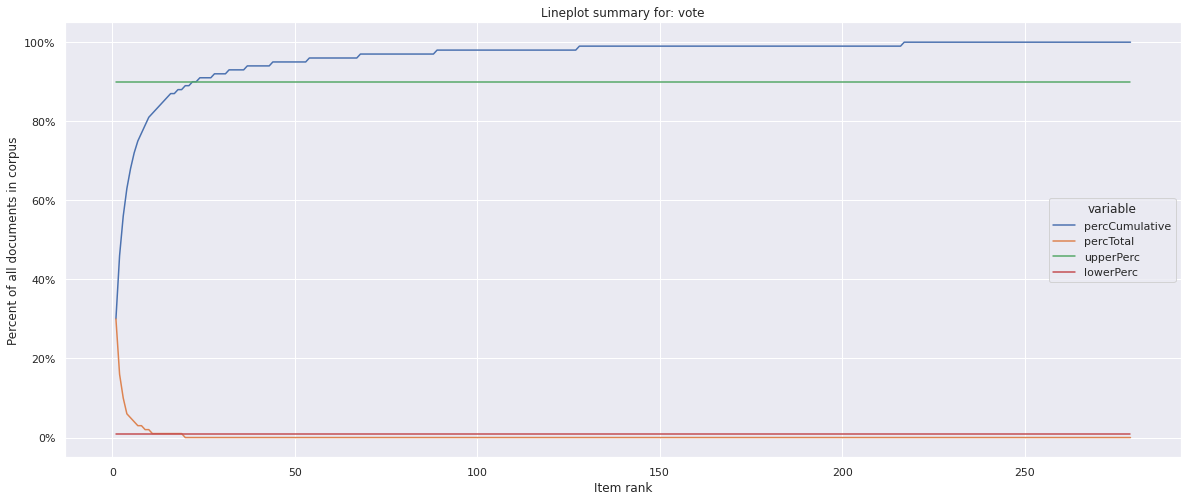




Barplot showing vote distribution
--->Dataset too large for barchart visibility: 279





,analysisStage,columnName,totalDocuments,totalNulls,totalCategories,upperPerc,lowerPerc,percTotalDocuments,percTotalCategories
0,original,vote,12512,0,279,1.0,0.00,1.0,1.0
1,Trimmed,vote,12512,0,279,0.9,0.01,1.0,1.0


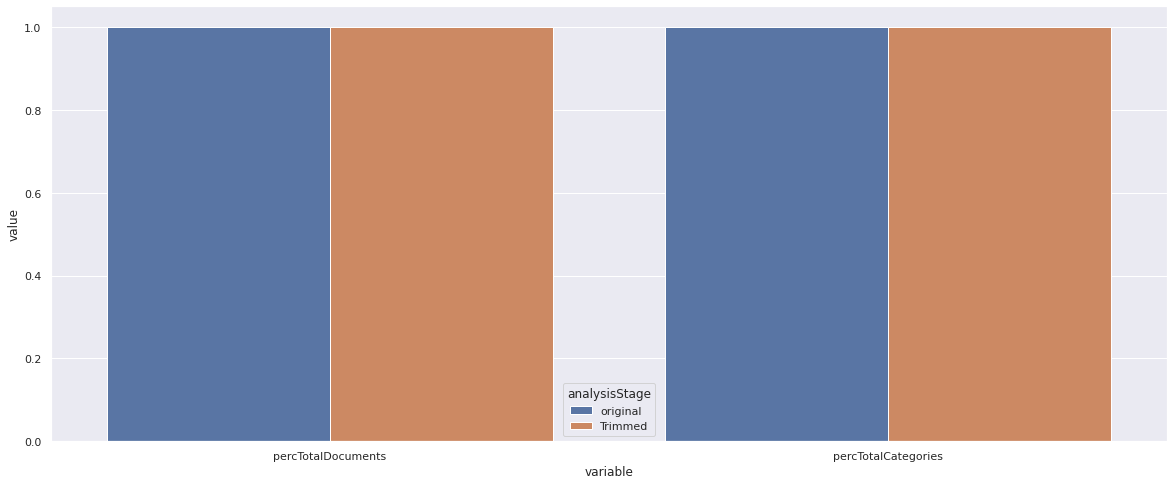

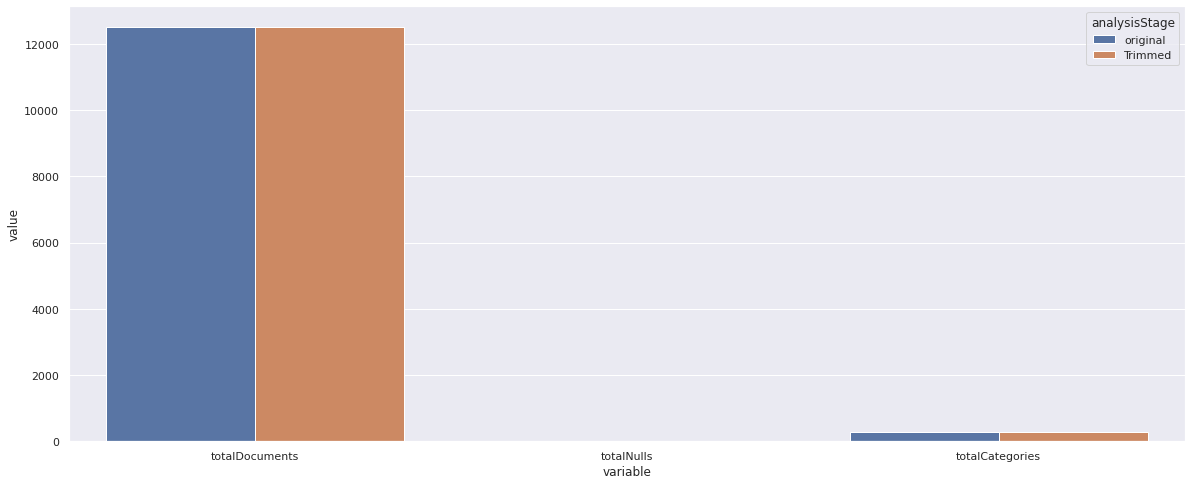

In [ ]:
expDf = mvutils.columnExplore(dataFrame = data, analysisColName = 'vote')

In [ ]:
expDf = mvutils.columnExplore(dataFrame = data, analysisColName = 'category', lowerPerc=0.0)

Beginning analysis on 'Main' frame......
Analysis column: main_cat
Distinct values (incl. null): 5
Number of null values: 0
Total documents in corpus: 63920

Top 20 for summary of column main_cat


,order,main_cat,docCount,cumulativeCount,percTotal,percCumulative
1,1,Cell Phones & Accessories,63461,63461,0.99,0.99
2,2,All Electronics,367,63828,0.01,1.00
3,3,Apple Products,46,63874,0.00,1.00
4,4,Amazon Home,29,63903,0.00,1.00
5,5,Computers,17,63920,0.00,1.00




Last 20 for summary of column main_cat


,order,main_cat,docCount,cumulativeCount,percTotal,percCumulative
1,1,Cell Phones & Accessories,63461,63461,0.99,0.99
2,2,All Electronics,367,63828,0.01,1.00
3,3,Apple Products,46,63874,0.00,1.00
4,4,Amazon Home,29,63903,0.00,1.00
5,5,Computers,17,63920,0.00,1.00




Lineplot showing main_cat distribution


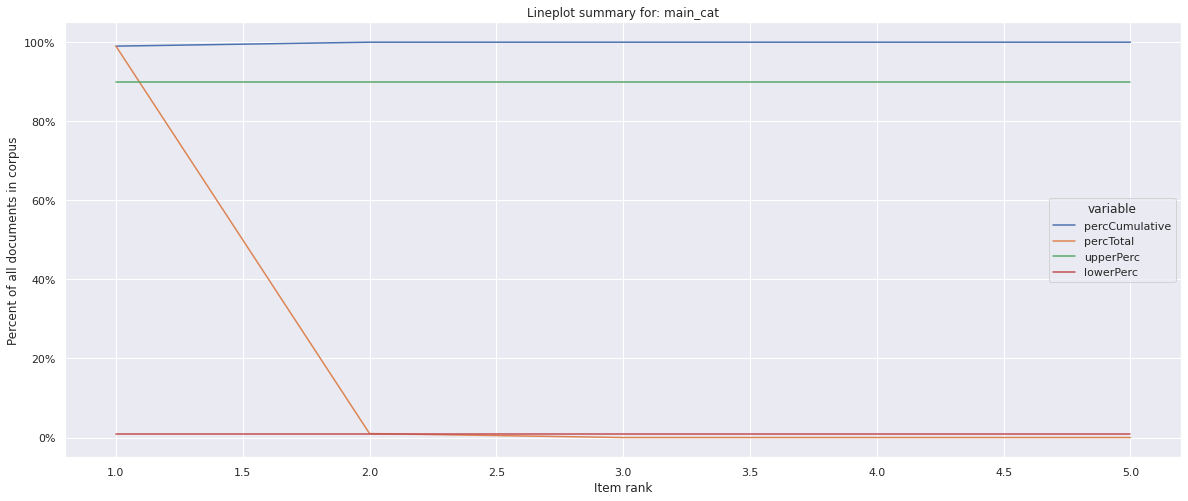




Barplot showing main_cat distribution


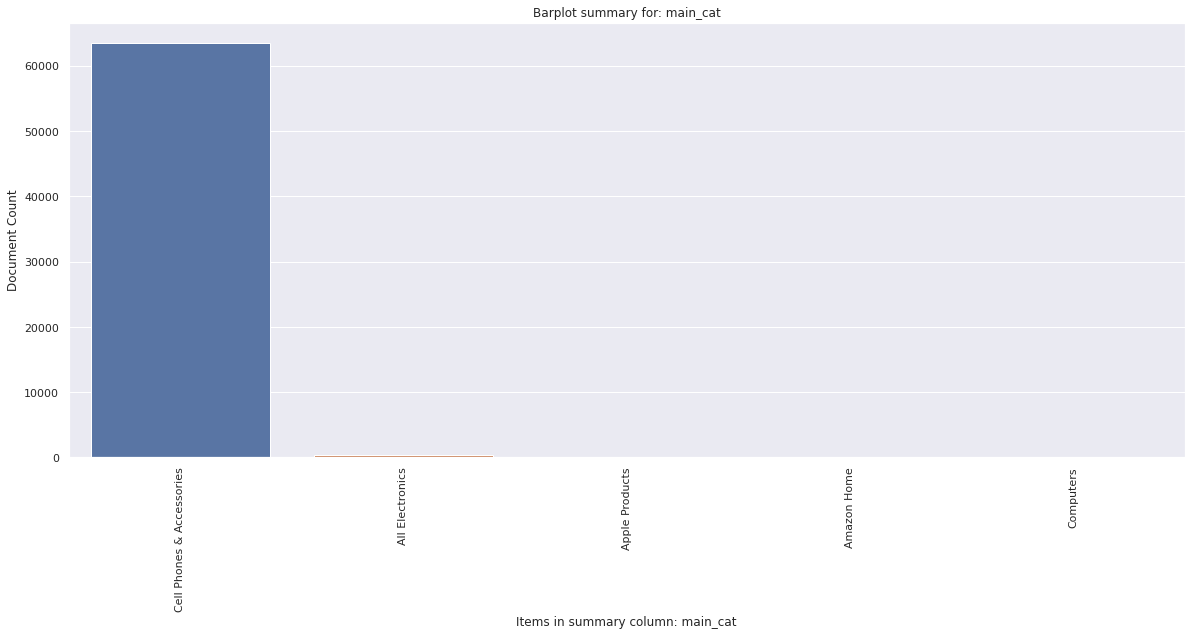




Beginning analysis on 'Focused' frame......
Analysis column: main_cat
Distinct values (incl. null): 5
Number of null values: 0
Total documents in corpus: 63920

Top 20 for summary of column main_cat


,order,main_cat,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,Cell Phones & Accessories,63461,63461,0.99,0.99,0.9,0.01,0,1
2,2,All Electronics,367,63828,0.01,1.00,0.9,0.01,0,1
3,3,Apple Products,46,63874,0.00,1.00,0.9,0.01,0,0
4,4,Amazon Home,29,63903,0.00,1.00,0.9,0.01,0,0
5,5,Computers,17,63920,0.00,1.00,0.9,0.01,0,0




Last 20 for summary of column main_cat


,order,main_cat,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,Cell Phones & Accessories,63461,63461,0.99,0.99,0.9,0.01,0,1
2,2,All Electronics,367,63828,0.01,1.00,0.9,0.01,0,1
3,3,Apple Products,46,63874,0.00,1.00,0.9,0.01,0,0
4,4,Amazon Home,29,63903,0.00,1.00,0.9,0.01,0,0
5,5,Computers,17,63920,0.00,1.00,0.9,0.01,0,0




Lineplot showing main_cat distribution


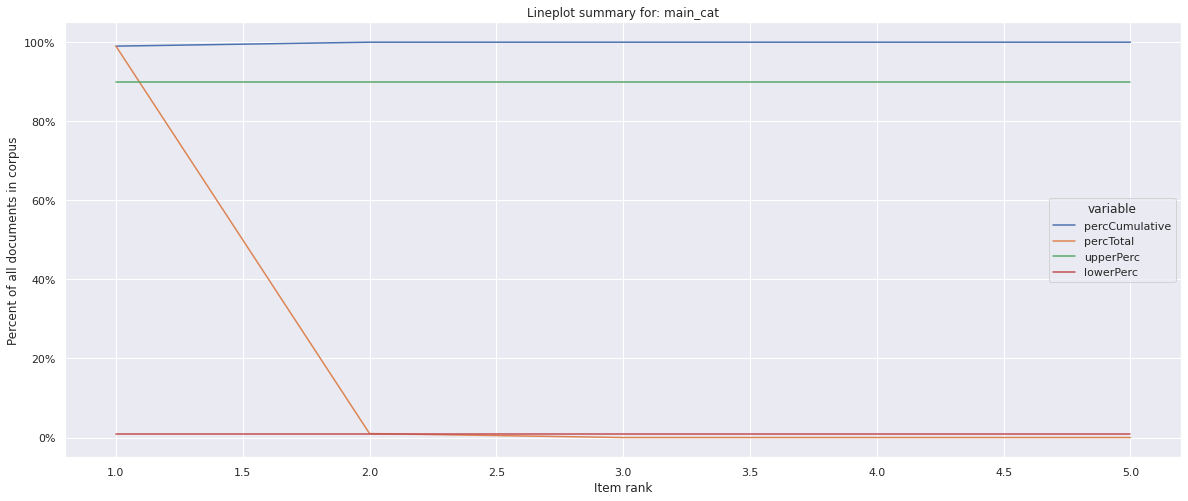




Barplot showing main_cat distribution


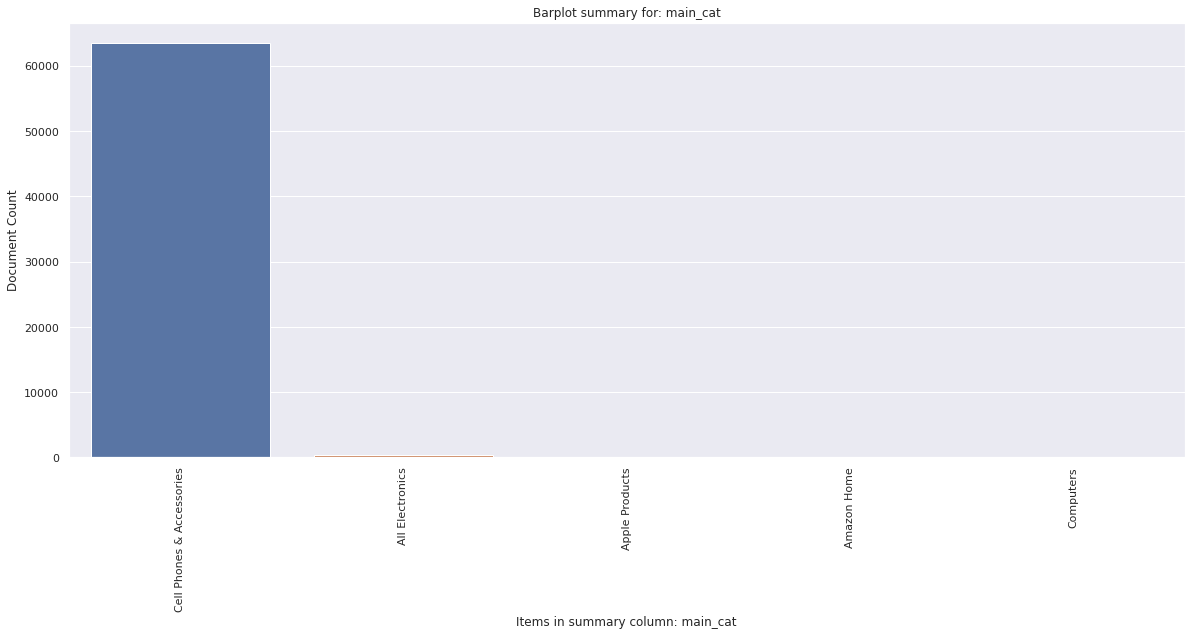

,analysisStage,columnName,totalDocuments,totalNulls,totalCategories,upperPerc,lowerPerc,percTotalDocuments,percTotalCategories
0,original,main_cat,63920,0,5,1.0,0.00,1.0,1.0
1,Trimmed,main_cat,63920,0,5,0.9,0.01,1.0,1.0


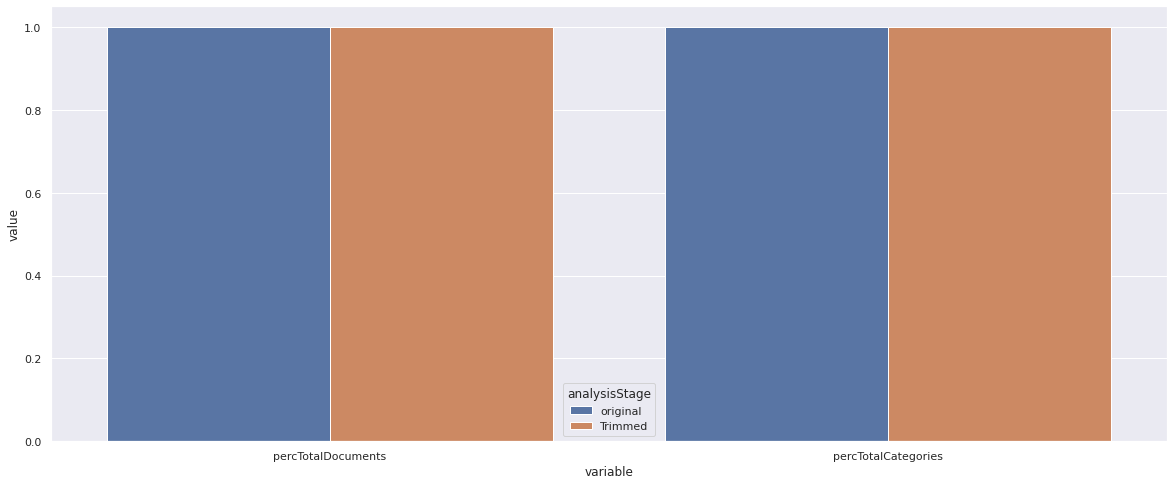

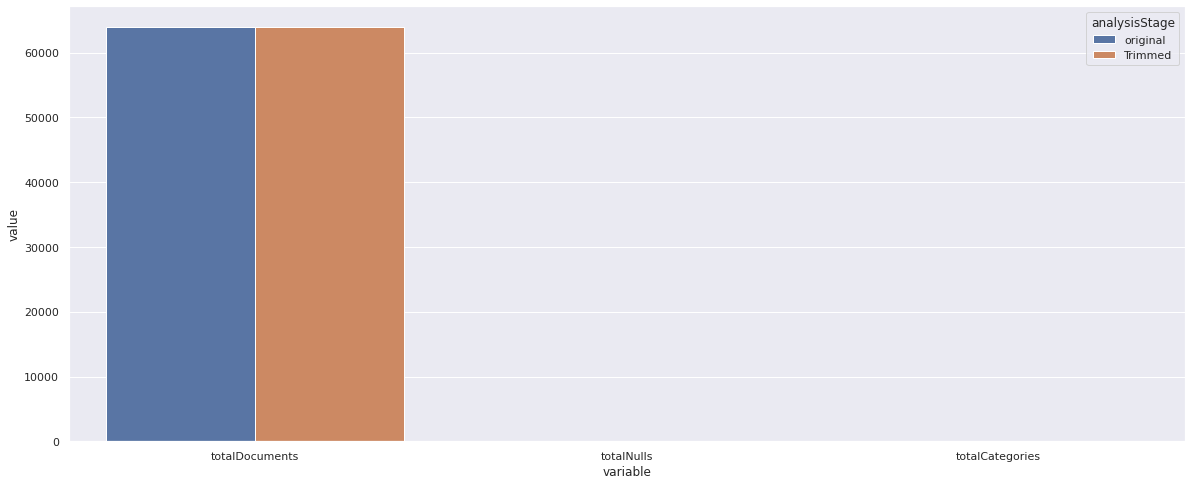

In [ ]:
expDf = mvutils.columnExplore(dataFrame = data, analysisColName = 'main_cat')

Beginning analysis on 'Main' frame......
Analysis column: price
Distinct values (incl. null): 403
Number of null values: 0
Total documents in corpus: 63920

Top 20 for summary of column price


,order,price,docCount,cumulativeCount,percTotal,percCumulative
1,1,,34814,34814,0.54,0.54
2,2,$40.08,2340,37154,0.04,0.58
3,3,$27.57,2262,39416,0.04,0.62
4,4,$15.98,1378,40794,0.02,0.64
5,5,$16.00,850,41644,0.01,0.65
6,6,$220.00,806,42450,0.01,0.66
7,7,$189.00,746,43196,0.01,0.68
8,8,$89.99,524,43720,0.01,0.68
9,9,$49.98,500,44220,0.01,0.69
10,10,$129.99,488,44708,0.01,0.70




Last 20 for summary of column price


,order,price,docCount,cumulativeCount,percTotal,percCumulative
384,384,$127.80,5,63835,0.0,1.0
385,385,$25.75,5,63840,0.0,1.0
386,386,$162.95,5,63845,0.0,1.0
387,387,$27.47,5,63850,0.0,1.0
388,388,$128.62,5,63855,0.0,1.0
389,389,$35.00,5,63860,0.0,1.0
390,390,$37.00,5,63865,0.0,1.0
391,391,$60.00,5,63870,0.0,1.0
392,392,$34.99,5,63875,0.0,1.0
393,393,$112.50,5,63880,0.0,1.0




Lineplot showing price distribution


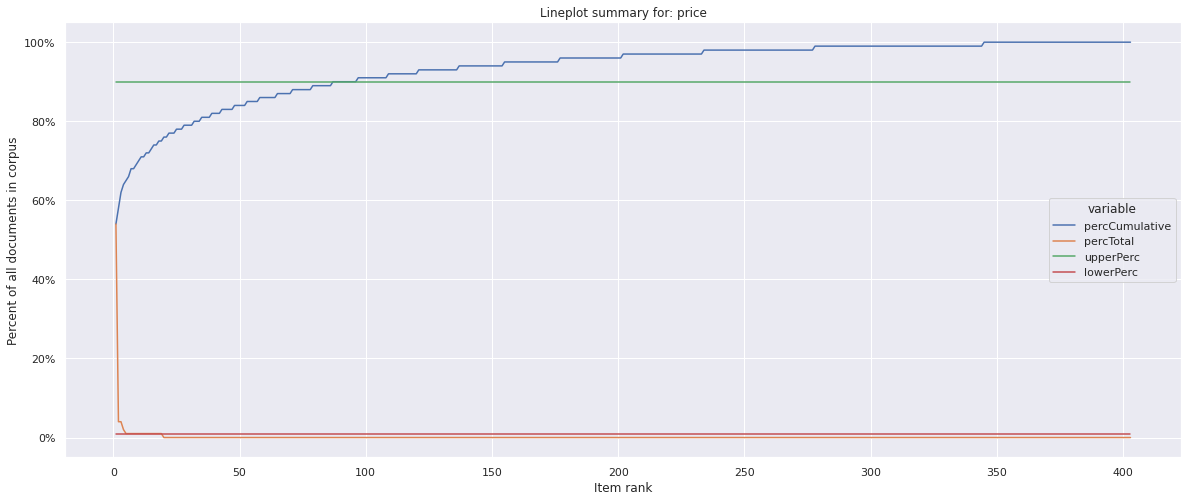




Barplot showing price distribution
--->Dataset too large for barchart visibility: 403



Beginning analysis on 'Focused' frame......
Analysis column: price
Distinct values (incl. null): 403
Number of null values: 0
Total documents in corpus: 63920

Top 20 for summary of column price


,order,price,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,,34814,34814,0.54,0.54,0.9,0.01,1,1
2,2,$40.08,2340,37154,0.04,0.58,0.9,0.01,1,1
3,3,$27.57,2262,39416,0.04,0.62,0.9,0.01,1,1
4,4,$15.98,1378,40794,0.02,0.64,0.9,0.01,1,1
5,5,$16.00,850,41644,0.01,0.65,0.9,0.01,1,1
6,6,$220.00,806,42450,0.01,0.66,0.9,0.01,1,1
7,7,$189.00,746,43196,0.01,0.68,0.9,0.01,1,1
8,8,$89.99,524,43720,0.01,0.68,0.9,0.01,1,1
9,9,$49.98,500,44220,0.01,0.69,0.9,0.01,1,1
10,10,$129.99,488,44708,0.01,0.70,0.9,0.01,1,1




Last 20 for summary of column price


,order,price,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
384,384,$127.80,5,63835,0.0,1.0,0.9,0.01,0,0
385,385,$25.75,5,63840,0.0,1.0,0.9,0.01,0,0
386,386,$162.95,5,63845,0.0,1.0,0.9,0.01,0,0
387,387,$27.47,5,63850,0.0,1.0,0.9,0.01,0,0
388,388,$128.62,5,63855,0.0,1.0,0.9,0.01,0,0
389,389,$35.00,5,63860,0.0,1.0,0.9,0.01,0,0
390,390,$37.00,5,63865,0.0,1.0,0.9,0.01,0,0
391,391,$60.00,5,63870,0.0,1.0,0.9,0.01,0,0
392,392,$34.99,5,63875,0.0,1.0,0.9,0.01,0,0
393,393,$112.50,5,63880,0.0,1.0,0.9,0.01,0,0




Lineplot showing price distribution


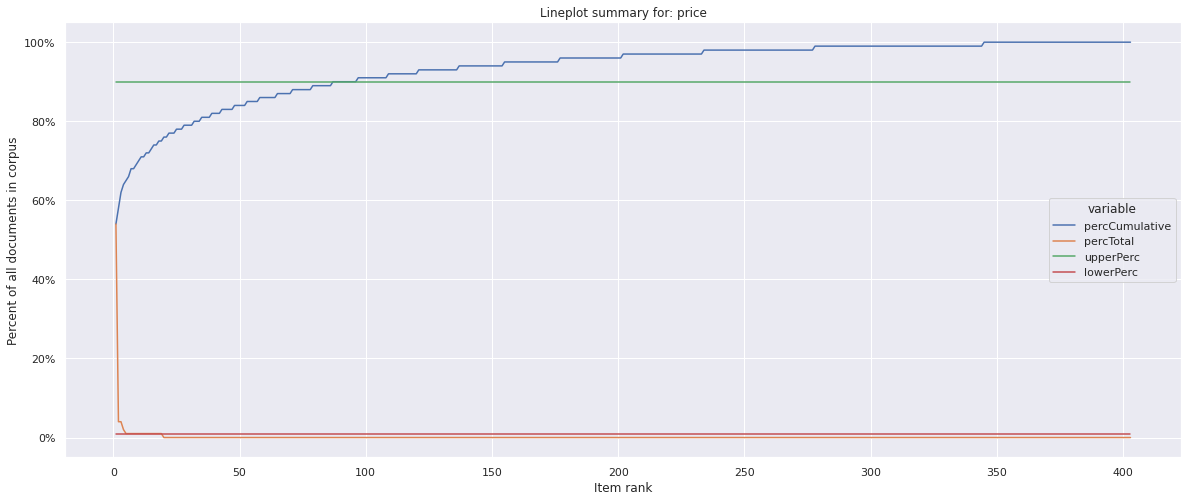




Barplot showing price distribution
--->Dataset too large for barchart visibility: 403





,analysisStage,columnName,totalDocuments,totalNulls,totalCategories,upperPerc,lowerPerc,percTotalDocuments,percTotalCategories
0,original,price,63920,0,403,1.0,0.00,1.0,1.0
1,Trimmed,price,63920,0,403,0.9,0.01,1.0,1.0


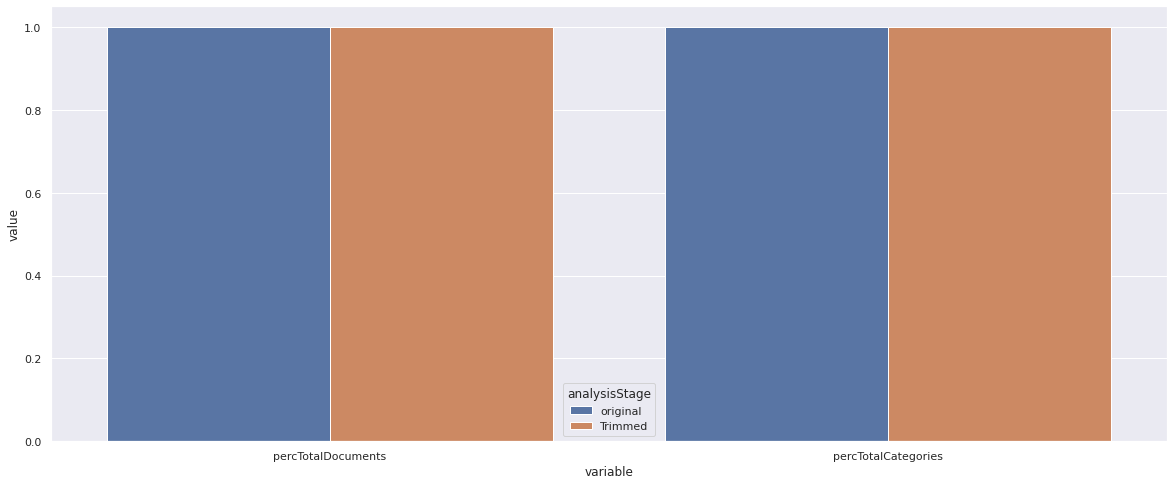

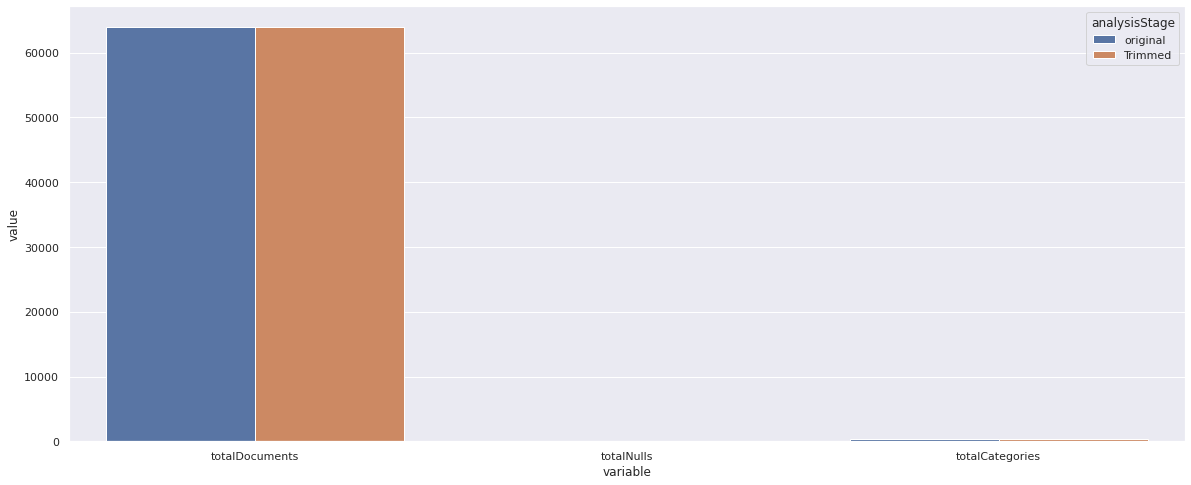

In [ ]:
expDf = mvutils.columnExplore(dataFrame = data, analysisColName = 'price')

Beginning analysis on 'Main' frame......
Analysis column: category
Distinct values (incl. null): 3
Number of null values: 0
Total documents in corpus: 63920

Top 20 for summary of column category


,order,category,docCount,cumulativeCount,percTotal,percCumulative
1,1,"['Cell Phones & Accessories', 'Cell Phones', '...",47994,47994,0.75,0.75
2,2,"['Cell Phones & Accessories', 'Cell Phones', '...",14179,62173,0.22,0.97
3,3,"['Cell Phones & Accessories', 'Cell Phones']",1747,63920,0.03,1.00




Last 20 for summary of column category


,order,category,docCount,cumulativeCount,percTotal,percCumulative
1,1,"['Cell Phones & Accessories', 'Cell Phones', '...",47994,47994,0.75,0.75
2,2,"['Cell Phones & Accessories', 'Cell Phones', '...",14179,62173,0.22,0.97
3,3,"['Cell Phones & Accessories', 'Cell Phones']",1747,63920,0.03,1.00




Lineplot showing category distribution


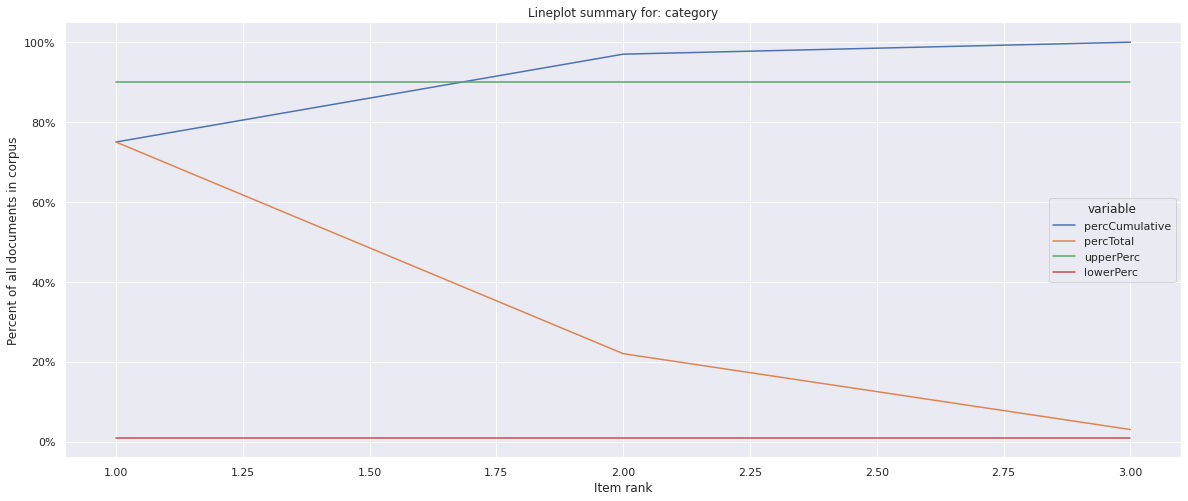




Barplot showing category distribution


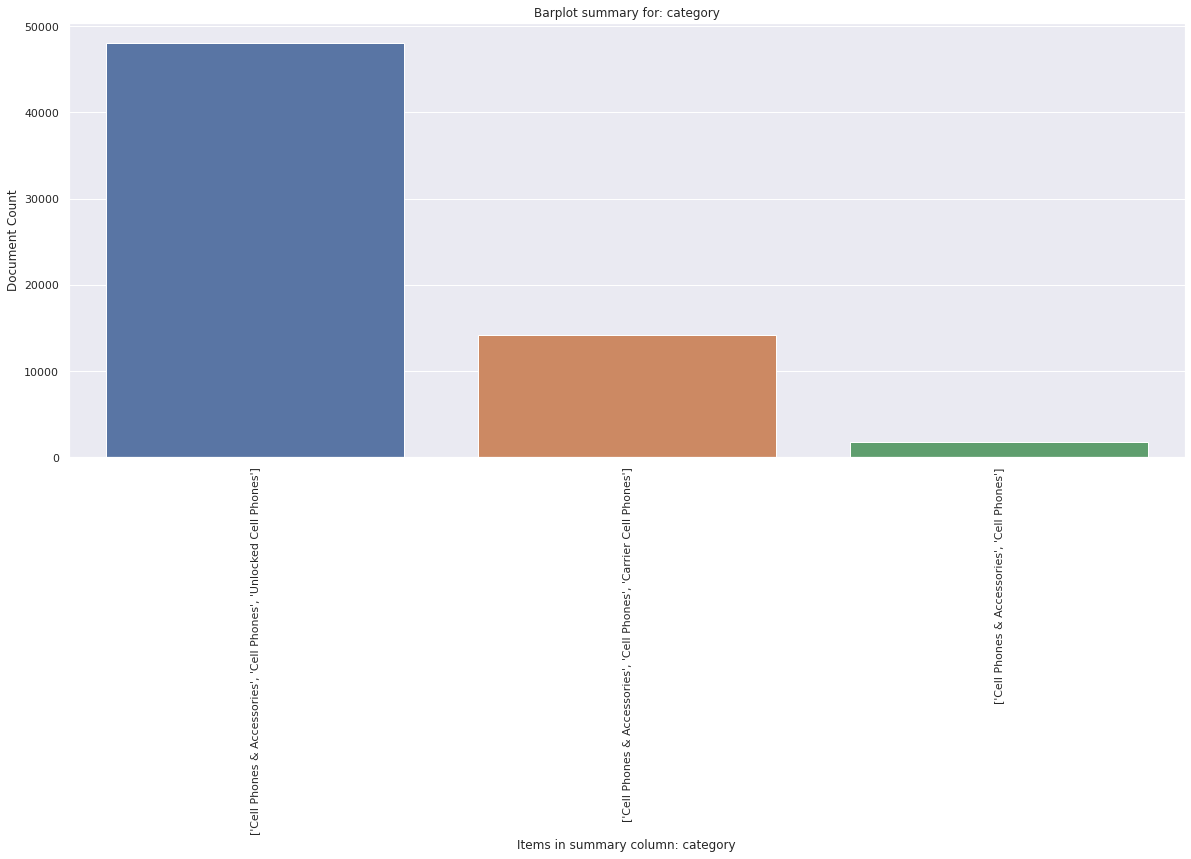




Beginning analysis on 'Focused' frame......
Analysis column: category
Distinct values (incl. null): 3
Number of null values: 0
Total documents in corpus: 63920

Top 20 for summary of column category


,order,category,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,"['Cell Phones & Accessories', 'Cell Phones', '...",47994,47994,0.75,0.75,0.9,0.01,1,1
2,2,"['Cell Phones & Accessories', 'Cell Phones', '...",14179,62173,0.22,0.97,0.9,0.01,0,1
3,3,"['Cell Phones & Accessories', 'Cell Phones']",1747,63920,0.03,1.00,0.9,0.01,0,1




Last 20 for summary of column category


,order,category,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,"['Cell Phones & Accessories', 'Cell Phones', '...",47994,47994,0.75,0.75,0.9,0.01,1,1
2,2,"['Cell Phones & Accessories', 'Cell Phones', '...",14179,62173,0.22,0.97,0.9,0.01,0,1
3,3,"['Cell Phones & Accessories', 'Cell Phones']",1747,63920,0.03,1.00,0.9,0.01,0,1




Lineplot showing category distribution


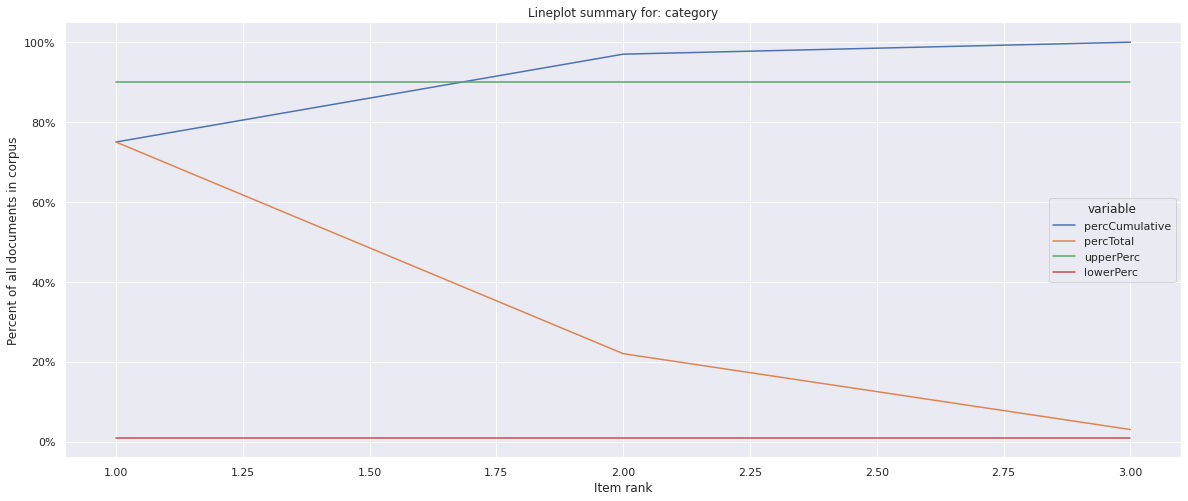




Barplot showing category distribution


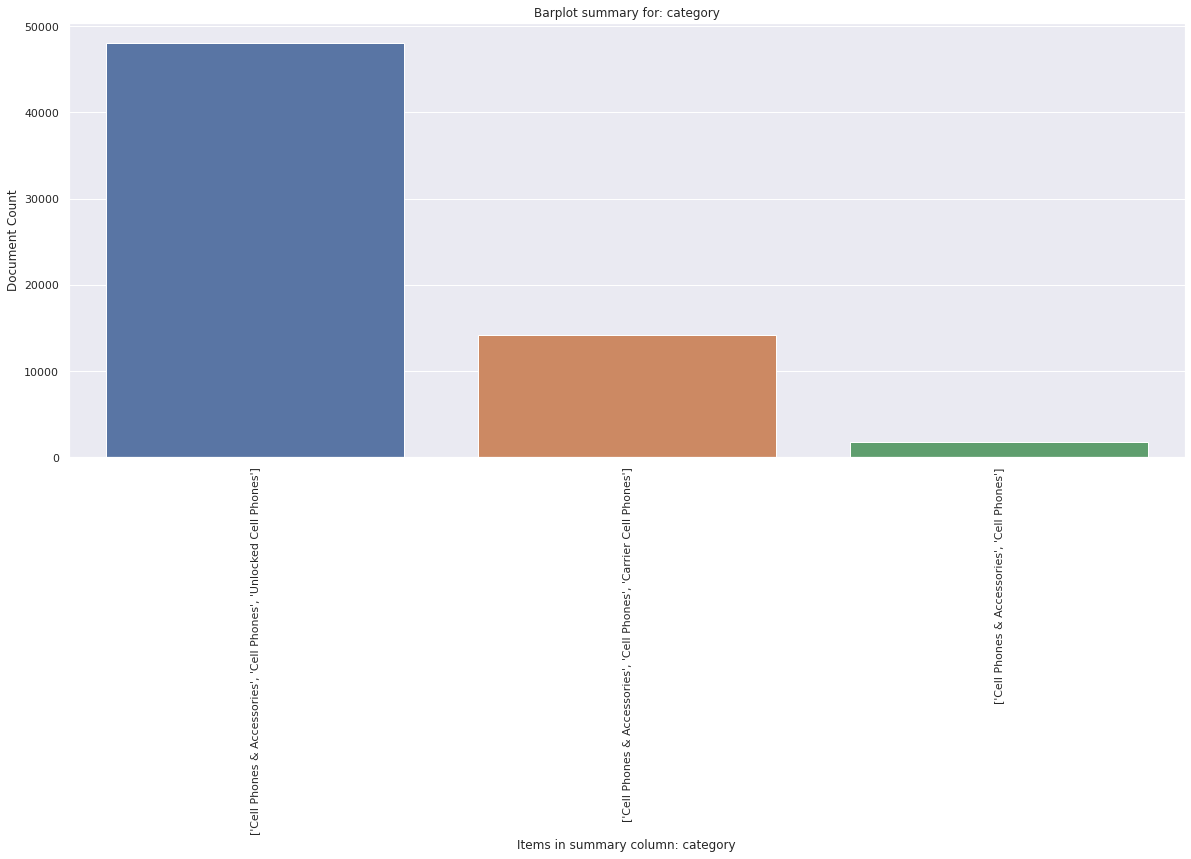

,analysisStage,columnName,totalDocuments,totalNulls,totalCategories,upperPerc,lowerPerc,percTotalDocuments,percTotalCategories
0,original,category,63920,0,3,1.0,0.00,1.0,1.0
1,Trimmed,category,63920,0,3,0.9,0.01,1.0,1.0


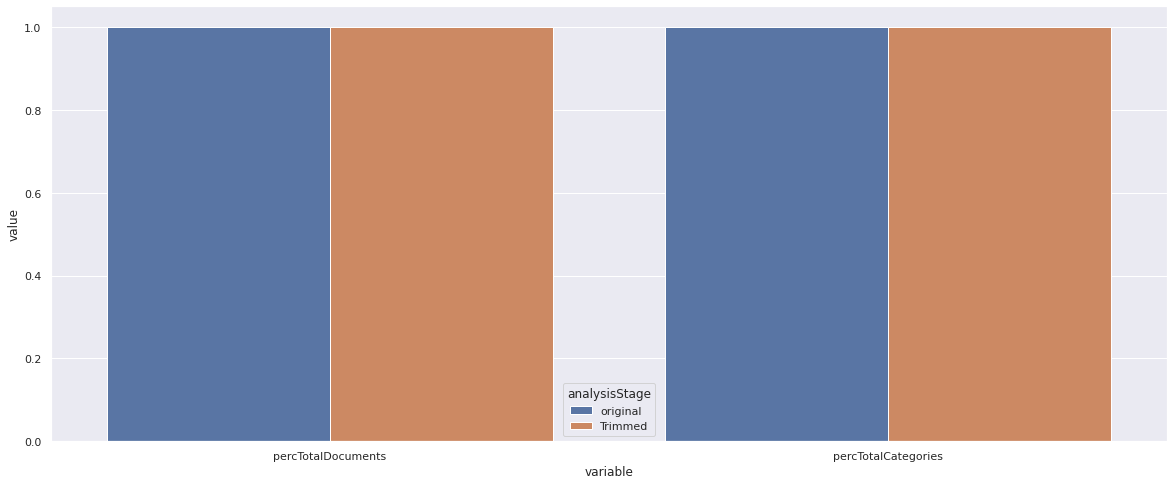

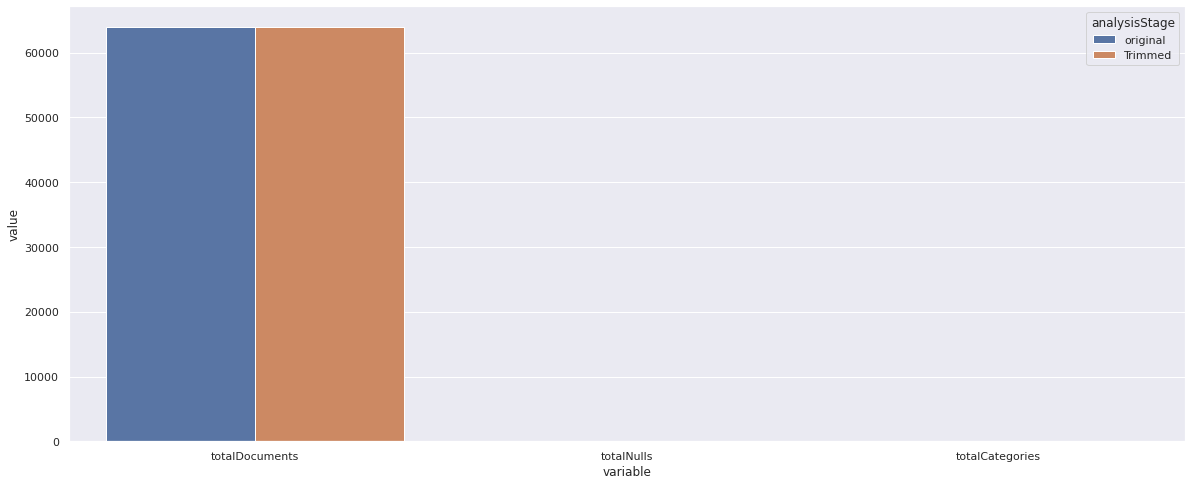

In [ ]:
expDf = mvutils.columnExplore(dataFrame = data, analysisColName = 'category')